In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from types import SimpleNamespace

In [2]:
radius_of_curvature = 4.3
diameter = 4.3

In [3]:
scale = radius_of_curvature
subdiv = 3

In [4]:
def vertex(x, y, z):
    length = np.sqrt(x**2 + y**2 + z**2)
    return [(i * scale) / length for i in (x,y,z)]

In [5]:
# --------------------------------------------------------------
# Make the base icosahedron

# Golden ratio
PHI = (1 + np.sqrt(5)) / 2

verts = [
          vertex(-1,  PHI, 0),
          vertex( 1,  PHI, 0),
          vertex(-1, -PHI, 0),
          vertex( 1, -PHI, 0),

          vertex(0, -1, PHI),
          vertex(0,  1, PHI),
          vertex(0, -1, -PHI),
          vertex(0,  1, -PHI),

          vertex( PHI, 0, -1),
          vertex( PHI, 0,  1),
          vertex(-PHI, 0, -1),
          vertex(-PHI, 0,  1),
        ]


faces = [
         # 5 faces around point 0
         [0, 11, 5],
         [0, 5, 1],
         [0, 1, 7],
         [0, 7, 10],
         [0, 10, 11],

         # Adjacent faces
         [1, 5, 9],
         [5, 11, 4],
         [11, 10, 2],
         [10, 7, 6],
         [7, 1, 8],

         # 5 faces around 3
         [3, 9, 4],
         [3, 4, 2],
         [3, 2, 6],
         [3, 6, 8],
         [3, 8, 9],

         # Adjacent faces
         [4, 9, 5],
         [2, 4, 11],
         [6, 2, 10],
         [8, 6, 7],
         [9, 8, 1],
]

In [6]:
middle_point_cache = {}

def middle_point(point_1, point_2):
    """ Find a middle point and project to the unit sphere """

    # We check if we have already cut this edge first
    # to avoid duplicated verts
    smaller_index = min(point_1, point_2)
    greater_index = max(point_1, point_2)

    key = '{0}-{1}'.format(smaller_index, greater_index)

    if key in middle_point_cache:
        return middle_point_cache[key]

    # If it's not in cache, then we can cut it
    vert_1 = verts[point_1]
    vert_2 = verts[point_2]
    middle = [sum(i)/2 for i in zip(vert_1, vert_2)]

    verts.append(vertex(*middle))

    index = len(verts) - 1
    middle_point_cache[key] = index

    return index

In [7]:
for i in range(subdiv):
    faces_subdiv = []

    for tri in faces:
        v1 = middle_point(tri[0], tri[1])
        v2 = middle_point(tri[1], tri[2])
        v3 = middle_point(tri[2], tri[0])

        faces_subdiv.append([tri[0], v1, v3])
        faces_subdiv.append([tri[1], v2, v1])
        faces_subdiv.append([tri[2], v3, v2])
        faces_subdiv.append([v1, v2, v3])

    faces = faces_subdiv

In [8]:
(len(faces)-24)/2*3+ 24

1908.0

In [9]:
np.linalg.norm(np.array(verts[faces[0][0]]) - np.array(verts[faces[0][1]]))

0.5946176462528212

In [10]:
focal_length = (1/4) * (radius_of_curvature + np.sqrt(radius_of_curvature**2-(diameter/2)**2))

In [11]:
v = np.array(verts)

In [12]:
asort = np.argsort(v[:,2])

In [13]:
v1 = v[asort[0]]

In [14]:
v2 = v[asort[1]]

In [15]:
op = np.abs(v1[2]-v2[2])

In [16]:
adj = np.sqrt( (v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 )

In [17]:
np.linalg.norm(v1-v2)

0.5946176462528211

In [18]:
np.linalg.norm(v1-v2)-0.0333*2

0.5280176462528211

In [19]:
np.degrees(np.arctan(op/adj))

3.964684301432627

In [20]:
lengths = []

for f in faces:
    
    v1 = np.array(verts[f[0]])
    v2 = np.array(verts[f[1]])
    v3 = np.array(verts[f[2]])

    if    (np.sqrt(v1[0]**2 + v1[1]**2) < diameter / 2  \
        or np.sqrt(v2[0]**2 + v2[1]**2) < diameter / 2  \
        or np.sqrt(v3[0]**2 + v3[1]**2) < diameter / 2) \
        and v1[2] < 0 and v2[2] < 0 and v3[2] < 0:
    
        lengths.append(np.linalg.norm(v1 - v2))
        lengths.append(np.linalg.norm(v2 - v3))
        lengths.append(np.linalg.norm(v1 - v3))

In [21]:
lengths = set(np.round_(lengths, decimals=3))

In [22]:
lengths = sorted(list(lengths))

In [23]:
len(lengths)

14

In [25]:
lengths

[0.595,
 0.6,
 0.615,
 0.62,
 0.621,
 0.675,
 0.679,
 0.681,
 0.693,
 0.697,
 0.698,
 0.701,
 0.707,
 0.708]

<IPython.core.display.Javascript object>


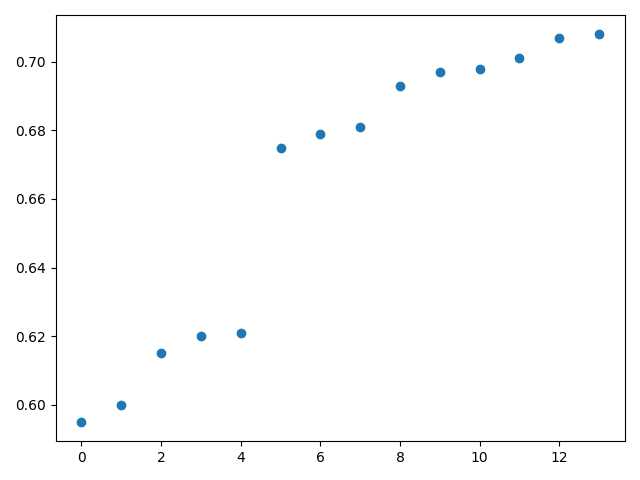

In [24]:
plt.figure()
plt.plot(sorted(lengths), 'o')
plt.tight_layout()

In [33]:
v[v1]

IndexError: arrays used as indices must be of integer (or boolean) type

In [34]:
v[v2]

IndexError: arrays used as indices must be of integer (or boolean) type

In [35]:
np.min(np.array(verts)[:,2])

-4.3

In [36]:
angles = []

for f in faces:
    
    v1 = np.array(verts[f[0]])
    v2 = np.array(verts[f[1]])
    v3 = np.array(verts[f[2]])

    e1 = v1 - v2
    e2 = v2 - v3
    e3 = v1 - v3

    if    (np.sqrt(v1[0]**2 + v1[1]**2) < diameter / 2  \
        or np.sqrt(v2[0]**2 + v2[1]**2) < diameter / 2  \
        or np.sqrt(v3[0]**2 + v3[1]**2) < diameter / 2) \
        and v1[2] < 0 and v2[2] < 0 and v3[2] < 0:

            unit_vector_1 = e1 / np.linalg.norm(e1)
            unit_vector_2 = e2 / np.linalg.norm(e2)

            dot_product = np.dot(unit_vector_1, unit_vector_2)

            angle = np.arccos(dot_product)
            
            if not np.isnan(angle):
                angles.append(angle)

In [37]:
angles = set(np.round_(angles, decimals=5))

In [38]:
angles = np.degrees(np.array(list(angles)))

In [39]:
angles.size

21

In [40]:
hubs = [[] for v in verts]
for f in faces:
    for i in range(3):

        v1 = np.array(verts[f[0]])
        v2 = np.array(verts[f[1]])
        v3 = np.array(verts[f[2]])

        if    (np.sqrt(v1[0]**2 + v1[1]**2) < diameter / 2  \
            or np.sqrt(v2[0]**2 + v2[1]**2) < diameter / 2  \
            or np.sqrt(v3[0]**2 + v3[1]**2) < diameter / 2) \
            and v1[2] < 0 and v2[2] < 0 and v3[2] < 0:
        
            hubs[f[i]].append(f)

In [41]:
class HubData():
    def __init__(self, idx):
        self.idx = idx
        self.normal_angles = []
        self.relative_angles = []
    def __eq__(self, other):

        if len(self.relative_angles) != len(other.relative_angles):
            return False

        self_rel_ang = np.round_(self.relative_angles).astype(int)
        other_rel_ang = np.round_(other.relative_angles).astype(int)

        for i in range(len(self_rel_ang)):
            self_rel_ang = np.concatenate(([0], self_rel_ang[1:])) - self_rel_ang[0]
            self_rel_ang[np.where(self_rel_ang >= 180)] -= 360
            self_rel_ang[np.where(self_rel_ang < -180)] += 360

            if sorted(self_rel_ang) == sorted(other_rel_ang):
                return True

        return False

In [42]:
hub_datas = []

for hub_index, hub in enumerate(hubs):
    
    if len(hub) == 0:
        continue
    
    hub_data = HubData(hub_index)

    others = set(v for face in hub for v in face if v != hub_index)

    normal_vector = np.array(verts[hub_index])
    normal_vector = normal_vector / np.linalg.norm(normal_vector)

    projected_vectors = []
    
    for endpoint in others:

        endpoint_vector = np.array(verts[hub_index]) - np.array(verts[endpoint])
        endpoint_vector = endpoint_vector / np.linalg.norm(endpoint_vector)

        dot_product = np.dot(normal_vector, endpoint_vector)

        angle = np.arccos(dot_product)

        pnv = (endpoint_vector - normal_vector * dot_product)
        
        projected_vector = pnv / np.linalg.norm(pnv)
        projected_vectors.append(projected_vector)

        hub_data.normal_angles.append(90 - np.degrees(angle))

    neg_x_vector = np.array([-1, 0, 0])

    dot_product = np.dot(normal_vector, neg_x_vector)
    base_vector = (neg_x_vector - normal_vector * dot_product)
    for i in range(len(projected_vectors)):

        rel_ang = np.degrees(np.arctan2(
            np.dot(base_vector, projected_vectors[i]),
            np.dot(np.cross(base_vector, projected_vectors[i]), normal_vector)
        ))
        
        hub_data.relative_angles.append(rel_ang)

    hub_datas.append(hub_data)

In [43]:
import openpyscad as ops

In [44]:
hub_radius = 30
hub_height = 20
pipe_inner_diamater = 15.7988-1
pipe_inner_radius = pipe_inner_diamater / 2
connector_length = 25

fn = 128

for i, hd in enumerate(hub_datas):

    angles = np.vstack((hd.relative_angles, hd.normal_angles)).T

    u1 = ops.Union()
    u2 = ops.Union()

    for a, b in angles:

        u1.append(
            ops.Cylinder(connector_length/3, pipe_inner_radius+2, _fn=fn
             ).rotate([b, 0, 0]).translate([0, 0, 25]).rotate([90, 0, 0]).rotate(a)
        )

        u2.append(
            (
                ops.Cylinder(connector_length, pipe_inner_radius, _fn=fn)
                -
                ops.Cylinder(connector_length, 2.5, center=True, _fn=fn).rotate([90, 0, 0]).translate([0,0,17])
            ).rotate([b, 0, 0]).translate([0, 0, 25]).rotate([90, 0, 0]).rotate(a)
        )



    scad = (
        ops.Text(
            f"\"{i:02d}\"",
            font = "\"Arial Black\"",
            size = 9,
            direction = "\"ltr\"",
            spacing = 1,
            halign = "\"center\""
        ).linear_extrude(height=1).translate([0, 20.2, 10])
        +
        (
            ops.Cylinder(hub_height, hub_radius, _fn=fn).translate([0,0, -hub_height/2])
            +
            u1
            +
            u2
        )
        -
        (
            ops.Cube([200,200, 10], center=True).translate([0,0,-12])
            +
            ops.Cylinder(hub_height+5, 20, center=True, _fn=fn)
        )

    )

    scad.write(f"hub_{i:02d}.scad")

In [45]:
import matplotlib.lines as mlines

In [46]:
lines = []
for i, l in enumerate(lengths):
    lines.append(mlines.Line2D([], [], color=cmap(i/(len(lengths)-1)), label=l))

In [47]:
ls = (np.array([0.595, 0.6, 0.615, 0.62, 0.621, 0.675, 0.679, 0.681, 0.693, 0.697, 0.698, 0.701, 0.707, 0.708]) - 0.066)*39.3701

alpha = [chr(i) for i in range(0x41, 0x40+len(ls)+1)]

for l, a in zip(ls, alpha):
    lead = np.floor(l)
    num = np.round((l - lead)*16)
    denom = 16
    if num != 0:
        while num % 2 == 0:
            num /= 2
            denom /= 2
    if denom == 1:
        print(f'{a} {lead+1:.0f}\"')  
    elif num == 0:
        print(f'{a} {lead:.0f}\"')          
    else:
        print(f'{a} {lead:.0f} {num:.0f}/{denom:.0f}\"')

A 20 13/16"
B 21"
C 21 5/8"
D 21 13/16"
E 21 7/8"
F 24"
G 24 1/8"
H 24 3/16"
I 24 11/16"
J 24 13/16"
K 24 7/8"
L 25"
M 25 1/4"
N 25 1/4"


<IPython.core.display.Javascript object>


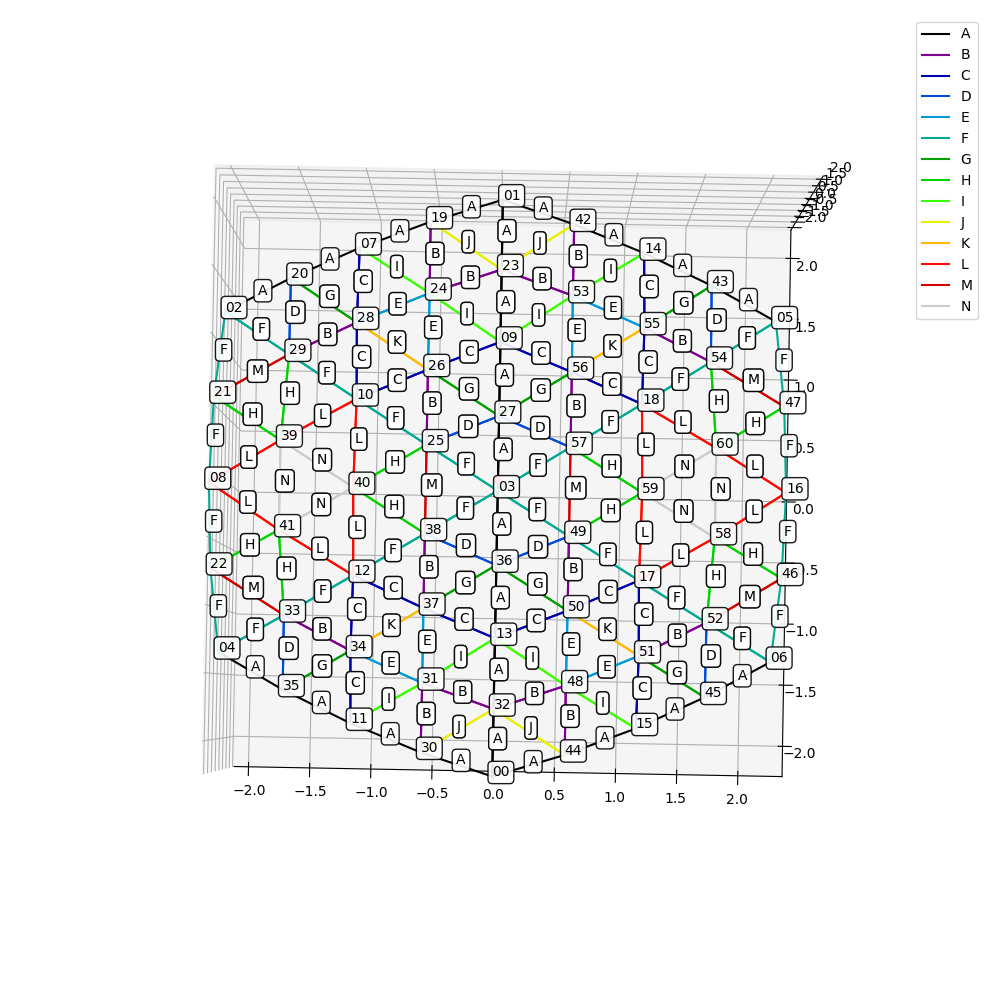

In [48]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

offset = radius_of_curvature - focal_length / 2

cmap = cm.get_cmap('nipy_spectral')

for f in faces:
    
    v1 = np.array(verts[f[0]])
    v2 = np.array(verts[f[1]])
    v3 = np.array(verts[f[2]])

    if    (np.sqrt(v1[0]**2 + v1[1]**2) < diameter / 2  \
        or np.sqrt(v2[0]**2 + v2[1]**2) < diameter / 2  \
        or np.sqrt(v3[0]**2 + v3[1]**2) < diameter / 2) \
        and v1[2] < 0 and v2[2] < 0 and v3[2] < 0:

        for v1, v2 in [(v1, v2), (v2, v3), (v1, v3)]:

            l1 = np.linalg.norm(v1 - v2)
            idx = lengths.index(np.round_(l1, decimals=3))
            l1 = idx / (len(lengths)-1)
            ax.plot3D((v1[0], v2[0]), (v1[1], v2[1]), (v1[2] + offset, v2[2] + offset), color=cmap(l1))

            txt = ax.text((v1[0] + v2[0]) / 2, (v1[1] + v2[1]) / 2, (v1[2] + v2[2]) / 2 + offset, chr(0x41+idx))
            txt.set_bbox(dict(
                facecolor='white',  # background color
                alpha=0.9,  # background alpha
                boxstyle='round'
            ))

ax.scatter3D(0, 0, focal_length / 2, color='C3')

for i, hd in enumerate(hub_datas):
    v = verts[hd.idx]
    txt = ax.text(v[0], v[1], v[2] + offset, f"{i:02d}")
    txt.set_bbox(dict(
        facecolor='white',  # background color
        alpha=0.9,  # background alpha
        boxstyle='round'
    ))
    
ax.set_box_aspect([1,1,1])
ax.set_xlim(-diameter/2, diameter/2)
ax.set_ylim(-diameter/2, diameter/2)
ax.set_zlim(-diameter/2, diameter/2)

ax.legend(lines, list(map(chr, 0x41+np.arange(0,14))))

plt.tight_layout()

In [49]:
print(list(map(chr, 0x41+np.arange(0,14))))
print(lengths)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
[0.595, 0.6, 0.615, 0.62, 0.621, 0.675, 0.679, 0.681, 0.693, 0.697, 0.698, 0.701, 0.707, 0.708]


In [50]:
import necpp
from scipy import constants

In [51]:
wavelength = constants.c / 401e6

In [52]:
class Segment():

    def __init__(self, x1, x2, y1, y2, z1, z2, wr, excitation=None, color='C4'):

        self.x1 = x1
        self.x2 = x2

        self.y1 = y1
        self.y2 = y2

        self.z1 = z1
        self.z2 = z2

        self.wr = wr
        self.excitation = excitation
        self.color = color

    def __eq__(self, other):
        a1 = (self.x1, self.y1, self.z1)
        a2 = (self.x2, self.y2, self.z2)
        b1 = (other.x1, other.y1, other.z1)
        b2 = (other.x2, other.y2, other.z2)
        return (a1 == b1 and a2 == b2) or (a1 == b2 and a2 == b1)


In [58]:
segments = []

wire_radius = 0.01

reflector_len = 0.495
dipole_len = 0.473
director_len = 0.440
refl_to_dip = 0.125
dip_to_dir = 0.125

x_off = 0
y_off = 0


# Reflector
segments.append(Segment( x_off, x_off,
                        -wavelength*reflector_len/2 + y_off, wavelength*reflector_len/2 + y_off,
                        focal_length - radius_of_curvature + offset + refl_to_dip,
                        focal_length - radius_of_curvature + offset + refl_to_dip,
                        wire_radius,
                        color='C2'))

# Dipole
segments.append(Segment( x_off, x_off,
                        -wavelength*dipole_len/2 + y_off, wavelength*dipole_len/2 + y_off,
                        focal_length - radius_of_curvature + offset,
                        focal_length - radius_of_curvature + offset,
                        wire_radius,
                        excitation=(1, 0),
                        color='C3'))

# Director
segments.append(Segment( x_off, x_off,
                        -wavelength*director_len/2 + y_off, wavelength*director_len/2 + y_off,
                        focal_length - radius_of_curvature + offset - dip_to_dir,
                        focal_length - radius_of_curvature + offset - dip_to_dir,
                        wire_radius,
                        color='C2'))

"""
NT = 0.5
D = 0.1
H = 0.187
points_per_helix = 10

xline = np.zeros((4, points_per_helix))
yline = np.zeros((4, points_per_helix))

zline = np.linspace(H, 0, points_per_helix) + focal_length - radius_of_curvature + offset

for i in range(4):
    xline[i] = D / 2 * np.sin(2 * np.pi * NT * (zline + H/2 + focal_length - radius_of_curvature + offset) / H + np.pi * i / 2)
    yline[i] = D / 2 * np.cos(2 * np.pi * NT * (zline + H/2 + focal_length - radius_of_curvature + offset) / H + np.pi * i / 2)

for i in range(4):
    for j in range(points_per_helix-1):
        segments.append(
            Segment(
                xline[i,j],
                xline[i,j+1],
                yline[i,j],
                yline[i,j+1],
                zline[j] - H/2,
                zline[j+1] - H/2,
                wire_radius))

for i in range(4):
    segments.append(
        Segment(
            xline[i,0],
            xline[i,0]*0.1,
            yline[i,0],
            yline[i,0]*0.1,
            zline[0] - H/2,
            zline[0] - H/2 + 0.005 * (1 if i%2 == 0 else -1),
            wire_radius,
        ))

for i in range(2):
    segments.append(
        Segment(
            xline[i  ,0]*0.1,
            xline[i+2,0]*0.1,
            yline[i  ,0]*0.1,
            yline[i+2,0]*0.1,
            zline[0] - H/2 + 0.005 * (1 if i%2 == 0 else -1),
            zline[0] - H/2 + 0.005 * (1 if i%2 == 0 else -1),
            wire_radius,
            excitation=(1 if i%2 == 0 else 0, 0 if i%2 == 0 else 1),
            color='C3'
        ))
"""

rt = 0.1

for f in faces:
    
    v1 = verts[f[0]]
    v2 = verts[f[1]]
    v3 = verts[f[2]]

    if    (np.sqrt(v1[0]**2 + v1[1]**2) < diameter / 2  \
        or np.sqrt(v2[0]**2 + v2[1]**2) < diameter / 2  \
        or np.sqrt(v3[0]**2 + v3[1]**2) < diameter / 2) \
        and v1[2] < 0 and v2[2] < 0 and v3[2] < 0:

        if(np.isclose(v1[0], v2[0], rtol=rt)):
            a = v1
            b = v2
            c = v3
        elif(np.isclose(v2[0], v3[0], rtol=rt)):
            a = v2
            b = v3
            c = v1
        elif(np.isclose(v1[0], v3[0], rtol=rt)):
            a = v1
            b = v3
            c = v2

        segments.append(Segment(a[0], b[0], a[1], b[1], a[2] + offset, b[2] + offset, wire_radius, color='C4'))
        #segments.append(Segment(v1[0], v2[0], v1[1], v2[1], v1[2] + offset, v2[2] + offset, wire_radius, color='C4'))
        #segments.append(Segment(v2[0], v3[0], v2[1], v3[1], v2[2] + offset, v3[2] + offset, wire_radius, color='C4'))
        #segments.append(Segment(v1[0], v3[0], v1[1], v3[1], v1[2] + offset, v3[2] + offset, wire_radius, color='C4'))
        
        interp = 9
        #print((b[0]-c[0])/interp)
        #break
        for i in range(1, interp):
            segments.append(
                Segment(
                    a[0] + (c[0]-a[0])*i/interp,
                    b[0] + (c[0]-b[0])*i/interp,
                    a[1] + (c[1]-a[1])*i/interp,
                    b[1] + (c[1]-b[1])*i/interp,
                    a[2] + (c[2]-a[2])*i/interp + offset,
                    b[2] + (c[2]-b[2])*i/interp + offset,
                    wire_radius,
                    color='C4'))

for i, s in enumerate(segments):
    s.tag = i + 1

In [59]:
wavelength/0.0626

11.942685538549792

In [60]:
segments2 = []
for i in segments:
    if i not in segments2:
        segments2.append(i)

In [61]:
segments = segments2

<IPython.core.display.Javascript object>


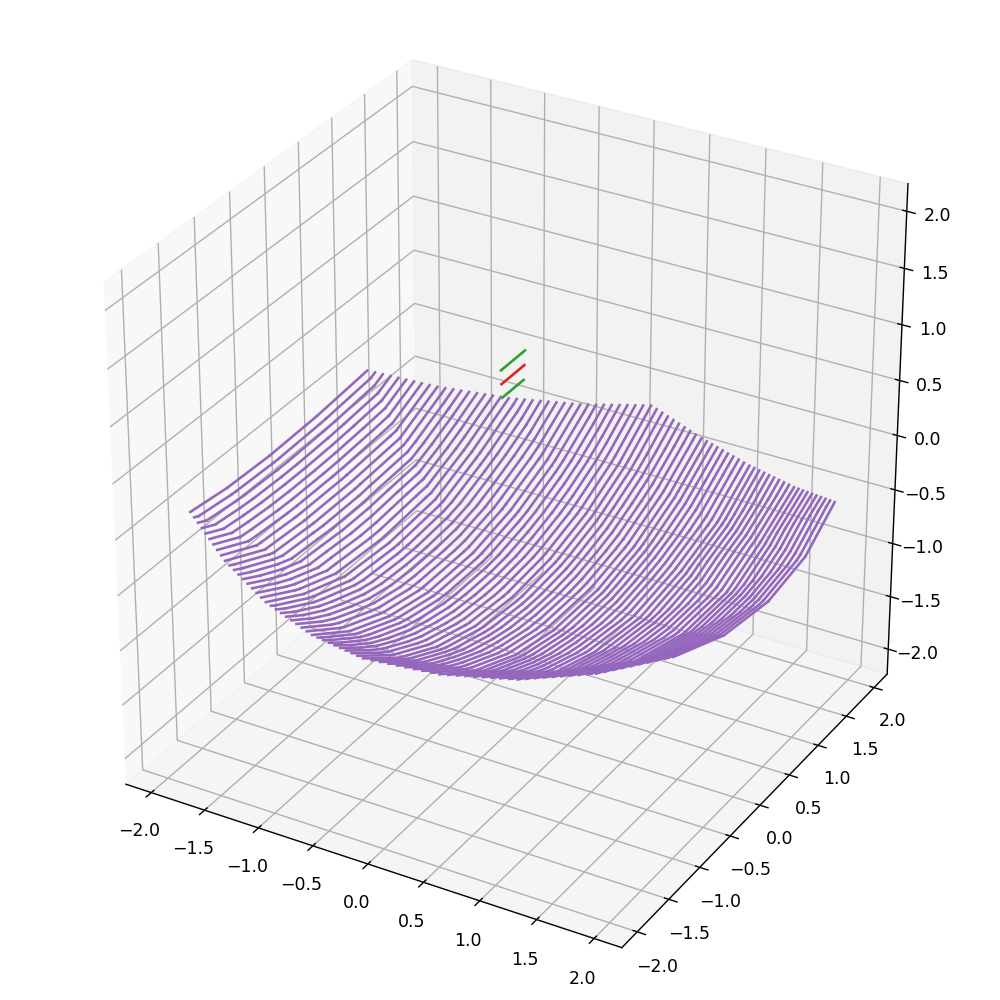

In [62]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

for s in segments:
    ax.plot3D((s.x1, s.x2), (s.y1, s.y2), (s.z1, s.z2), color=s.color)

ax.set_box_aspect([1,1,1])
ax.set_xlim(-diameter/2, diameter/2)
ax.set_ylim(-diameter/2, diameter/2)
ax.set_zlim(-diameter/2, diameter/2)

plt.tight_layout()

In [81]:
def calculate_antenna(segments):

    def handle_nec(result):
        if (result != 0):
            print(necpp.nec_error_message())

    center_frequency_MHz = 401
    span = 0
    nf = 1
    fgrid = np.linspace(center_frequency_MHz-span/2, center_frequency_MHz+span/2, nf)

    nec = necpp.nec_create()
    for s in segments:
        handle_nec(necpp.nec_wire(nec, s.tag, 9, s.x1, s.y1, s.z1, s.x2, s.y2, s.z2, s.wr, 1, 1))
        
    handle_nec(necpp.nec_geometry_complete(nec, 0))

    handle_nec(necpp.nec_gn_card(nec, -1, 0, 0, 0, 0, 0, 0, 0))
    handle_nec(necpp.nec_fr_card(nec, 0, len(fgrid), fgrid[0], 0))#fgrid[1]-fgrid[0]))

    for s in segments:
        if s.excitation is not None:
            print(s.tag)
            handle_nec(necpp.nec_excitation_voltage(nec, s.tag, 1, s.excitation[0], s.excitation[1]))

    n_theta = 360
    n_phi = 4
            
    # NORMAL, NTHETA, NPHI
    handle_nec(necpp.nec_rp_card(nec,
        0,    # Normal
        n_theta,
        n_phi,
        0,    # Output
        5,    # normalization: Total Gain Normalized
        0,    # Power or directive: Power
        0,    # No averaging
        -180,    # theta 0
        -180,   # phi 0
        1,
        90,
        0,    # radial distance: Far Field
        0     # gain norm
        ))

    result_index = 0

    theta = np.arange(-180, 180, 1)
    phi = np.arange(-180, 180, 90)

    gain = np.zeros((len(theta), len(phi)))
    
    for i in range(n_theta):
        for j in range(n_phi):
            gain[i,j] = necpp.nec_gain(nec, len(fgrid)//2, i, j)

    z = np.zeros(len(fgrid), dtype=complex)
    for i in range(len(fgrid)):
        z[i] = complex(necpp.nec_impedance_real(nec, i), 
                       necpp.nec_impedance_imag(nec, i))

    necpp.nec_delete(nec)

    return gain, z, theta, phi, fgrid

In [ ]:
gain, z, theta, phi, fgrid = calculate_antenna(segments)

In [ ]:
def plot_gain(gain):

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

    #ax.plot(np.radians(theta), 10**(gain[:,8]/10), label="Theta")
    #ax.plot(np.radians(theta), 10**(gain[18,:]/10), label="Phi")

    ax.plot(np.radians(theta), gain[:,0:2], label="Theta")
    #ax.plot(np.radians(theta), gain[:,:], label="Phi")

    #ax.set_rmax(2.5)
    #ax.set_rticks([0, 1, 2])

    ax.set_rmin(-5)
    ax.set_rticks([-5, 0, 5, 10, 15, 20, 25])  # Less radial ticks
    #ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

    #ax.legend()

    ax.grid(True)

In [ ]:
gain[170:190,0]

In [ ]:
#23.3
print(np.max(gain))

In [ ]:
plot_gain(gain)